## Assignment 1 - Random Number Generation

Implement LCG, Inverse Function, and special technique methods to generate variables following a given distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

---

### i) LCG approach

* Generate 60 unique random numbers $z_i$, $i= 1, 2, ... N$, using LCG approach. Choose the parameters of your choice

In [2]:
def lcg(a, c, m, seed = 0, N = 1):
    Z = [seed]
    
    for i in range(1, N+1):
        Z.append((a*Z[i-1] + c) % m)
    
    U = np.array(Z[1:])/m
    return U      

In [3]:
U1 = lcg(a = 3, c = 1, m = 2**3, N = 60)
U2 = lcg(a = 3, c = 1, m = 2**5, N = 60)
U3 = lcg(a = 3, c = 1, m = 2**10, N = 60)

In [4]:
np.unique(U2, return_counts = True)

(array([0.     , 0.03125, 0.125  , 0.15625, 0.25   , 0.28125, 0.375  ,
        0.40625, 0.5    , 0.53125, 0.625  , 0.65625, 0.75   , 0.78125,
        0.875  , 0.90625]),
 array([3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4], dtype=int64))

* Plot $z_i$ as a function of i
    - Color the first 20 point red, next 20 points blue, and last 20 points green

In [5]:
I = np.arange(1, len(U1)+1)

In [6]:
m_list = [2**3, 2**5, 2**10]
U_list = [U1, U2, U3]

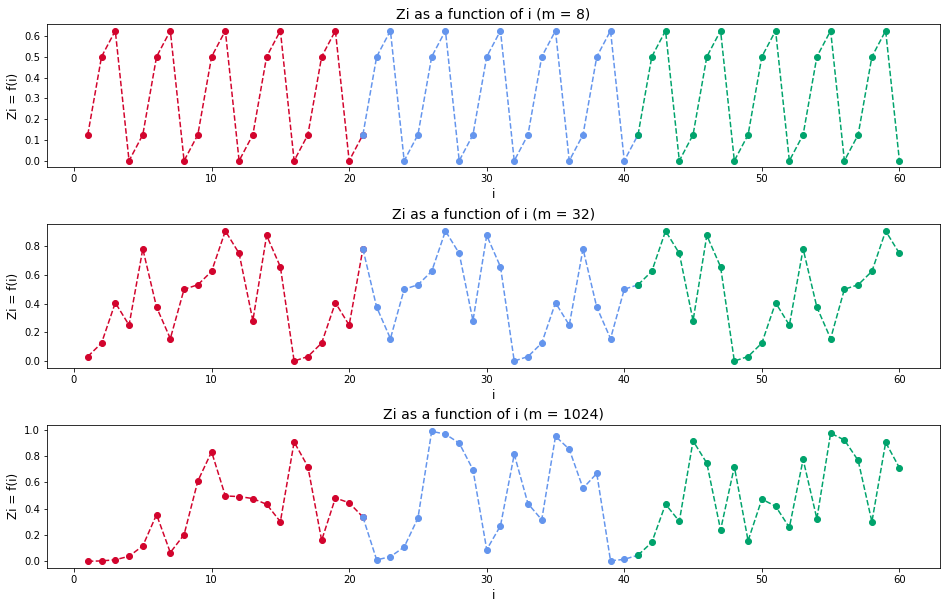

In [37]:
fig = plt.figure()

for i in range(1, 4):
    ax = fig.add_subplot(3, 1, i)
    ax.set_title('Zi as a function of i (m = {})'.format(m_list[i-1]), size = 14)
    ax.set_xlabel('i', size = 12)
    ax.set_ylabel('Zi = f(i)', size = 12)
    
    ax.plot(I[:21], U_list[i-1][:21], '--o', color = '#D2042D')
    ax.plot(I[20:41], U_list[i-1][20:41], '--o', color = '#6495ED')
    ax.plot(I[40:60], U_list[i-1][40:60], '--o', color = '#00A36C')

plt.rcParams['figure.figsize'] = (16, 10)
plt.subplots_adjust(hspace = 0.4)
plt.show()

__Comments on the randomness of Zi generated by LCGs approach__:
- The randomness of variables Zi generated by LCGs approach is not random enough.
- The "randomly" generated values appear to be periodic

As shown in the 3 plots with different modulus $m$'s

- Given the same multiplier $a$ and shift $c$, the smaller the modulus, the shorter the period between repititions.
    - For m = 10, the sequence repeats itself every 10 variables
    - For m = 32, the sequence repeats itself every 32 variables
    - For m = 1024, the sequence of 60 values does not seem to repeat itself.

This means that setting $m$ a large value allows large period between repetition and thus the generated values seem more 'random'


---

### ii) Generate 200 2-D points using

#### Sobol's approach

In [8]:
import sobol

In [9]:
S = sobol.sample(dimension = 2, n_points = 200)

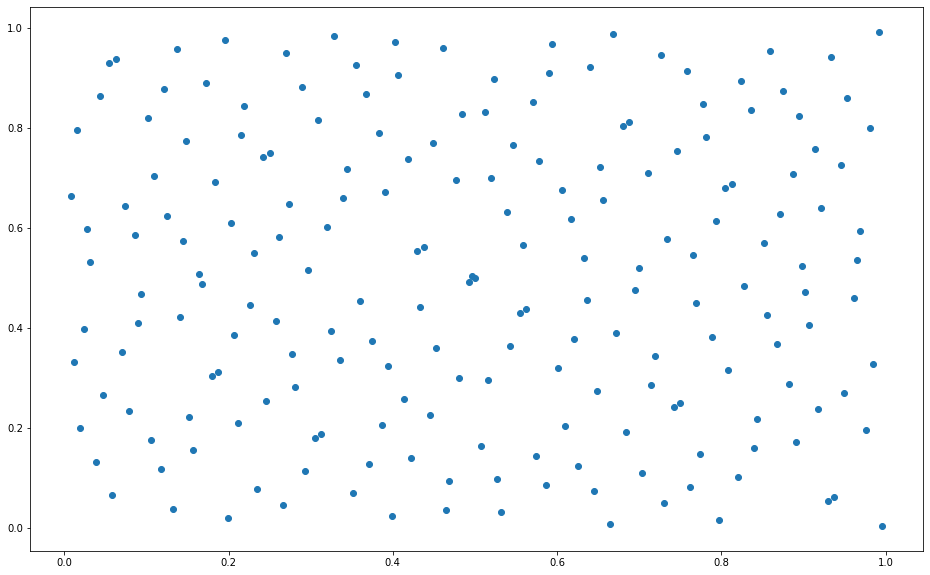

In [36]:
plt.scatter(S[:,0], S[:, 1])
plt.show()

#### Built-in random number generator

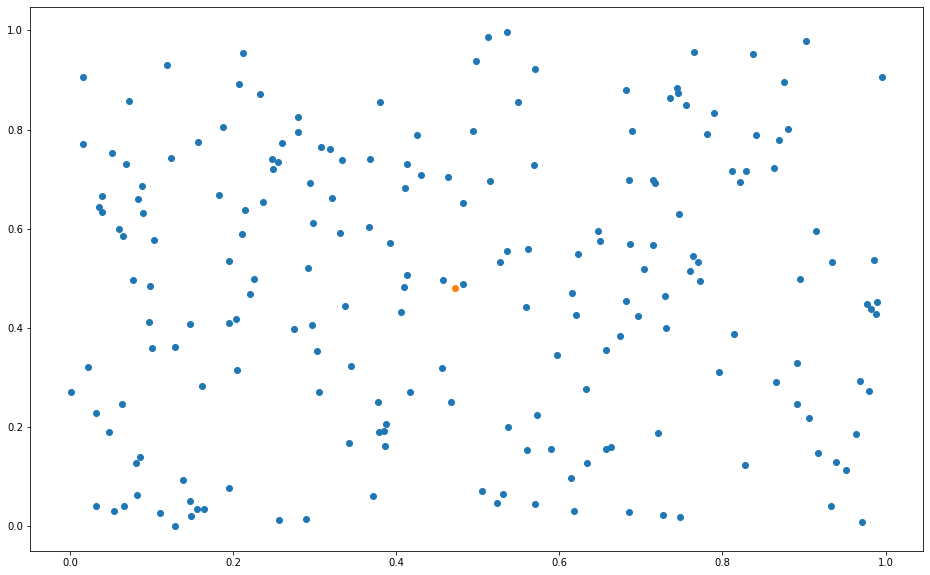

In [11]:
R = np.random.rand(200,2)
plt.scatter(R[:, 0], R[:, 1])
plt.scatter(R.mean(axis = 0)[0], R.mean(axis=0)[1])
plt.show()

---

### iii) Generate N random variables by finding the inverse functions

Generate N continuous variables having the following distributions

#### (1) Uniform
Generate $X \sim U(low, high)$

In [12]:
def uniform_itm(low, high, N = 1, shape = (-1,)):
    """
    Arguments:
     - low: the lower bound of the interval
     - high: the higher bound of the interval
     - N: the number of random variables generated
     - shape: the shape of the result array
    Return:
     - an array of random variables generated from uniform distribution on the given interval    
    """
    U = np.random.uniform(0, 1, N)
    X = (high - low)*U + low
    
    return X.reshape(shape)

In [13]:
low = 0
high = 3

U = uniform_itm(low, high, 1000)
#U

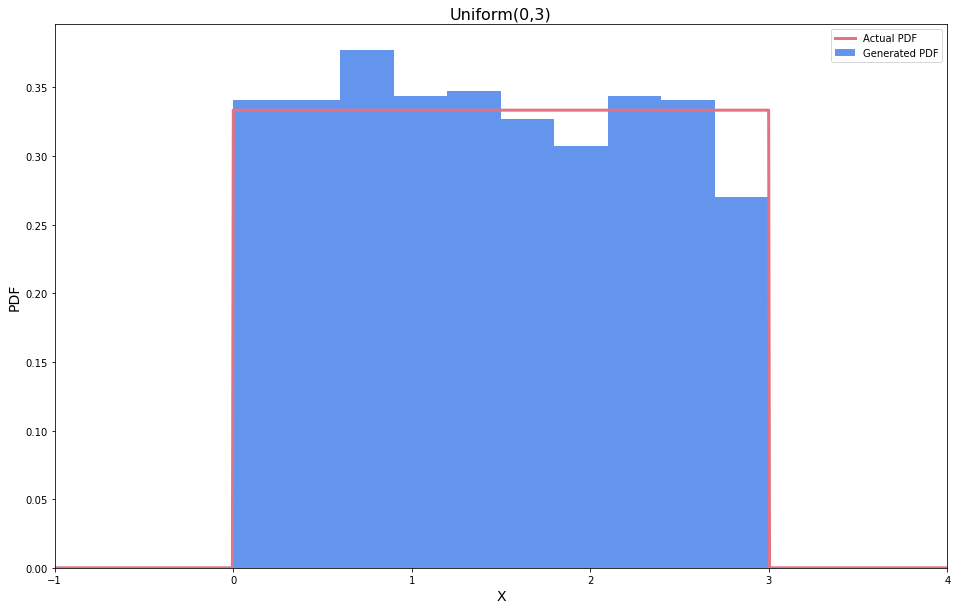

In [14]:
fig, ax = plt.subplots(1,1)
ax.set_title('Uniform({},{})'.format(low, high), size = 16)
ax.set_xlabel('X', size = 14)
ax.set_ylabel('PDF', size =  14)

#PDF of generated values
ax.hist(U, density = True, color = '#6495ED', label = 'Generated PDF')

#PDF of actual Uniform distribution
X = np.linspace(-1, 4, 1000)
Y = ss.uniform.pdf(X, 0, 3)
ax.plot(X, Y, lw = 3, color = '#E37383', label = 'Actual PDF')

ax.legend()
plt.xlim(-1, 4)
plt.show()

---
#### (2) Exponential

Generate $X \sim Exp(\lambda)$

In [15]:
def exp_itm(lmd, N = 1, shape = (-1,)):
    """
    Arguments:
     - lmd: parameter lambda of the exponential distribution (i.e., the rate)
     - N: the number of random variables generated
     - shape: the shape of the result array
    Return:
     - an array of random variables generated from exponential distribution with specified lambda
    """
    
    U = np.random.uniform(0, 1, N)
    X = (-1/lmd) * np.log(U)
    
    return X.reshape(shape)

In [16]:
myLambda = 2/3
E = exp_itm(myLambda, 1000)

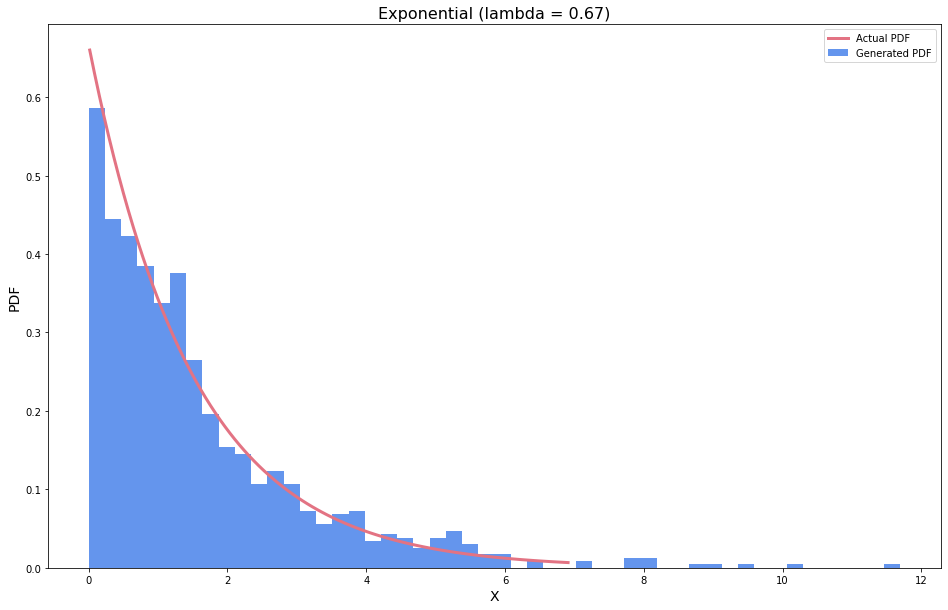

In [17]:
fig, ax = plt.subplots(1,1)
ax.set_title('Exponential (lambda = {:.2f})'.format(myLambda), size = 16)
ax.set_xlabel('X', size = 14)
ax.set_ylabel('PDF', size =  14)

ax.hist(E, bins = 50, density = True, color = '#6495ED', label = 'Generated PDF')

#Plotting actual Exponential(lambda = 1.5)
mean = 1/myLambda
std = 1/myLambda
X = np.linspace(ss.expon.ppf(0.01, scale = std),
                ss.expon.ppf(0.99, scale = std),
                100)

ax.plot(X, ss.expon.pdf(X, scale = std), lw = 3, color = '#E37383', label = 'Actual PDF')
ax.legend()

plt.show()

---
#### (3) Bernouli 
Generate $X \sim Bernoulli(p)$

In [18]:
def bernoulli_itm(p, N = 1, shape = (-1,)):
    """
    Arguments:
     - p: probability of value 1
     - N: the number of random variables generated
     - shape: the shape of the result array
    Return:
     - an array of random variables generated from exponential distribution with specified lambda
    """
    
    U = np.random.uniform(0, 1, N)
    
    X = np.where(U <= 1-p, 0, 1)
    
    return X.reshape(shape)

In [19]:
p = 0.3
B = bernoulli_itm(p, 1000)

In [20]:
#The unique values and frequencies of each in the generated value
B_values, B_freq = np.unique(B, return_counts = True)

#The probability mass of the generated array is
B_mass = B_freq/1000

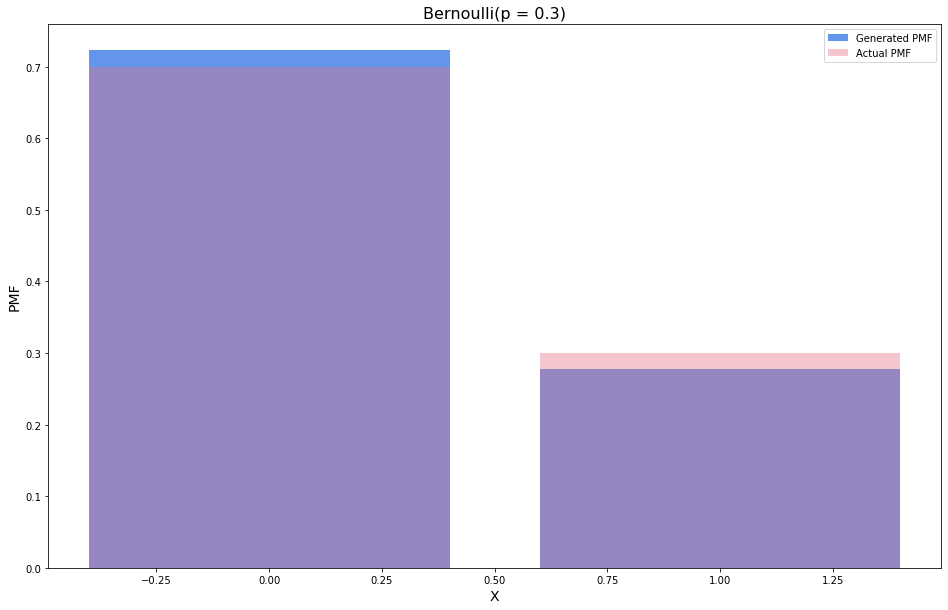

In [21]:
fig, ax = plt.subplots(1,1)
ax.set_title('Bernoulli(p = 0.3)', size = 16)
ax.set_xlabel('X', size = 14)
ax.set_ylabel('PMF', size =  14)

#Plotting generated pmf
ax.bar(B_values, B_mass, color = '#6495ED', label = 'Generated PMF')

#Plotting actual pmf
bnl = ss.bernoulli(0.3)
plt.bar([0,1], bnl.pmf([0,1]), color = '#E37383', alpha = 0.4, label = 'Actual PMF')

ax.legend()
plt.show()

---
#### (4) Given Probability Mass Function
|  $X_i$  |  -4  |  -1  |   2  |  3  |
|------|------|------|------|-----|
| $P_i$|  0.2  |  0.1  |   0.3  |  0.4  |


In [22]:
def pmf_itm(prob_dict, N = 1, shape = (-1,)):
    """
    Arguments:
     - prob_dict: A python dictionary of possible outcomes as keys and corresponding probability as values
    
    Return:
     - An array of random variables from given distribution
    """
    import collections
    
    #Probability Mass Function
    prob_dict = collections.OrderedDict(sorted(probs.items()))
    X = np.array(list(prob_dict.keys()))
    P = np.array(list(prob_dict.values()))
    CP = np.cumsum(P) #cumulative probabilities
    
    U = np.random.uniform(0, 1, N)
       
    for i in range(len(prob_dict)):
        if i == 0:
            U[U < CP[i]] = X[i]
        else:
            U[(U >= CP[i-1]) & (U < CP[i])] = X[i]
    
    return U

In [23]:
probs = {-1: 0.1,
         2: 0.3,
         3: 0.4,
        -4: 0.2}

In [24]:
P = pmf_itm(probs, N = 1000)

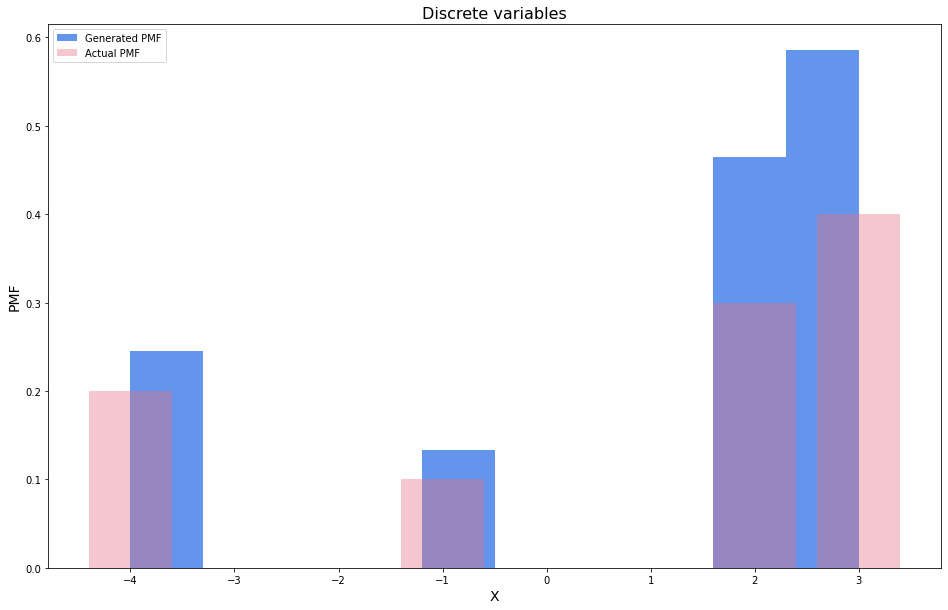

In [25]:
fig, ax = plt.subplots(1,1)
ax.set_title('Discrete variables', size = 16)
ax.set_xlabel('X', size = 14)
ax.set_ylabel('PMF', size =  14)

#Plotting generated pmf
ax.hist(P, density = True, color = '#6495ED', label = 'Generated PMF')

#Plotting actual pmf
ax.bar([-4, -1, 2, 3], [0.2, 0.1, 0.3, 0.4], color = '#E37383', alpha = 0.4, label = 'Actual PMF')

ax.legend()
plt.show()

---
### iv) Generate N random variables using special techniques

#### Poisson

In [26]:
N = 20
lmd = 3

In [27]:
def poisson_itm(lmd, N = 1, shape = (-1,)):
    """
    Arguments:
    - lmd: the parameter lambda of the desired Poisson distribution
    - N: the number of random variables to generate
    
    Return:
    - N random variables following Poisson distribution with rate lambda
    """
    X = np.array([])
    
    for j in range(N):
        sumTaui = 0
        i = 1
        while sumTaui <=1:
            Taui = exp_itm(lmd, N = 1)
            sumTaui += Taui
            i += 1
        Xj = i-2
        X = np.append(X, Xj)
    
    return X.reshape(shape)

In [28]:
#Choosing lambda = 4
Ps = poisson_itm(lmd = 4, N = 1000)

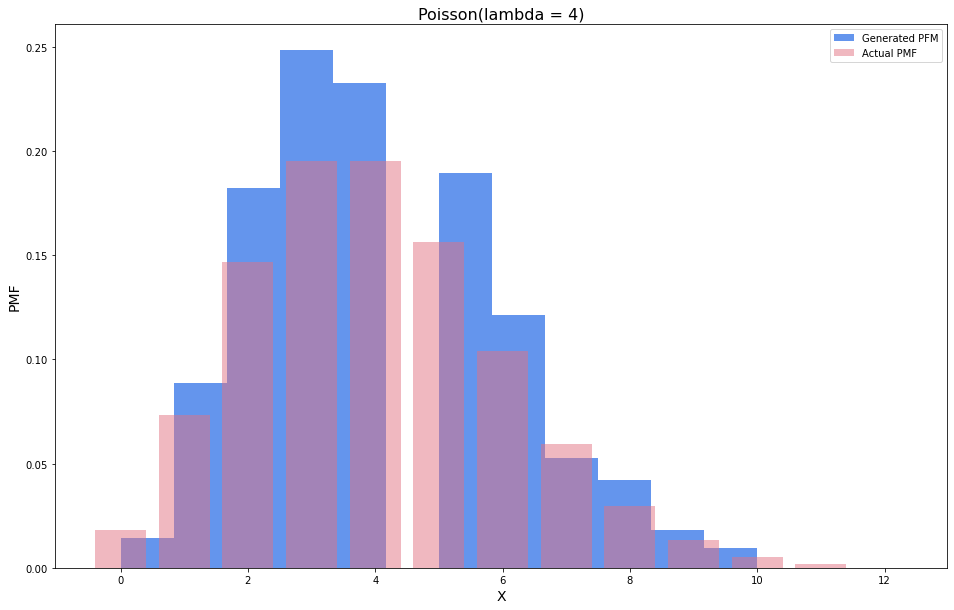

In [29]:
fig, ax = plt.subplots(1,1)

#Plotting generated values
ax.set_title('Poisson(lambda = 4)', size = 16)
ax.set_xlabel('X', size = 14)
ax.set_ylabel('PMF', size =  14)

ax.hist(Ps, bins = 12, density = True, color = '#6495ED', label = 'Generated PFM')

#Plotting actual PMF of Poisson(lambda = 4)
X = np.arange(0, 12, 0.05)
X_pmf = ss.poisson.pmf(X, mu = 4, loc = 0)
ax.bar(X, X_pmf, color = '#E37383', alpha = 0.5, label = 'Actual PMF')
#Y2 = ss.expon.pdf(X, 0, 3)
ax.legend()

plt.show()

---
#### Binomial

In [30]:
def binomial_itm(n, p, N = 1, shape = (-1,)):
    """
    Arguments:
    - n: the number of trials
    - p: the probability of success
    - N: the number of randome variables to generate
    
    Return:
    - N random variables following binomial distribution with probability of success p
    """
    
    X = np.array([])
    
    for j in range(1, N+1):
        
        Yi = bernoulli_itm(p, N = n)
        Xj = np.sum(Yi)
        X = np.append(X, Xj)
    
    return X

In [31]:
n = 100
p = 0.6
B = binomial_itm(n = n, p = p, N = 1000)

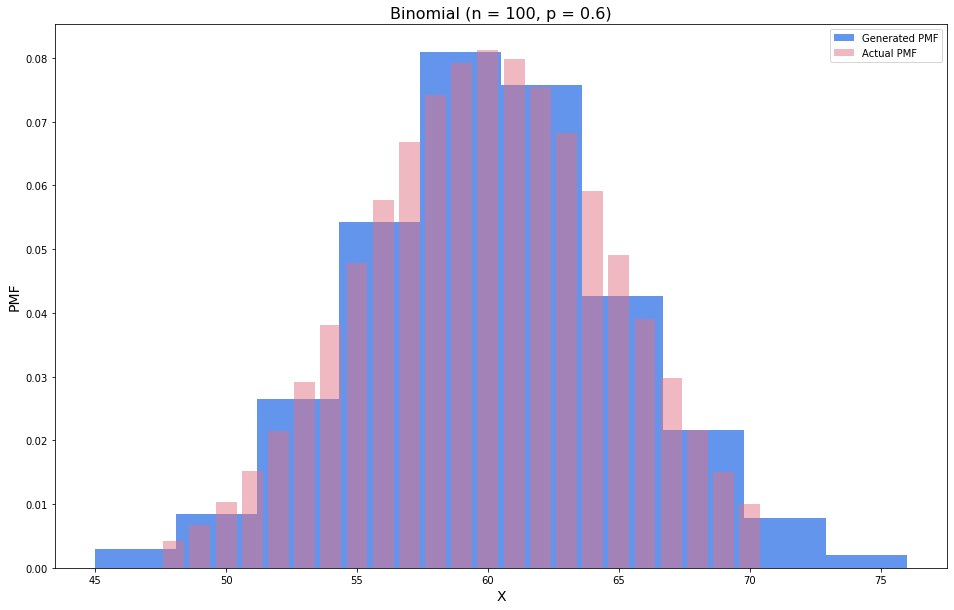

In [32]:
fig, ax = plt.subplots(1,1)

#Plotting generated pmf
ax.set_title('Binomial (n = {}, p = {})'.format(n, p), size = 16)
ax.set_xlabel('X', size = 14)
ax.set_ylabel('PMF', size =  14)

ax.hist(B, density = True, color = '#6495ED', label = 'Generated PMF')

#Plotting actual pmf
x = np.arange(ss.binom.ppf(0.01, n, p),
              ss.binom.ppf(0.99, n, p))
ax.bar(x, ss.binom.pmf(x, n, p), color = '#E37383', alpha = 0.5, label = 'Actual PMF')

ax.legend()
plt.show()

---
#### Gamma

In [33]:
def gamma_itm(alpha, beta, N = 1, shape = (-1,)):
    X = np.array([])
    
    for j in range(1, N+1):
        Yi = exp_itm(lmd = 1/beta, N = alpha)
        Xj = np.sum(Yi)
        X = np.append(X, Xj)
    
    return X

In [34]:
alpha = 3
beta = 1
X = gamma_itm(alpha, beta, N = 1000)

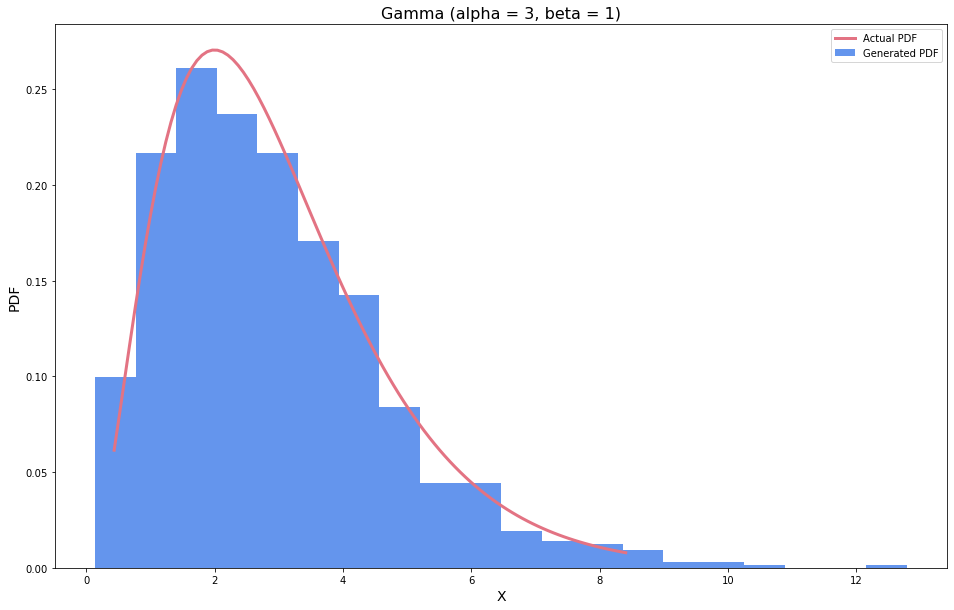

In [35]:
fig, ax = plt.subplots(1,1)

#Plotting generated pmf
ax.set_title('Gamma (alpha = {}, beta = {})'.format(alpha, beta), size = 16)
ax.set_xlabel('X', size = 14)
ax.set_ylabel('PDF', size =  14)

plt.hist(X, bins = 20, density = True, label = 'Generated PDF', color = '#6495ED')

#Plotting actual pdf
x = np.linspace(ss.gamma.ppf(0.01, a = alpha, scale = beta),
                ss.gamma.ppf(0.99, a = alpha, scale = beta),
               100)
x_pdf = ss.gamma.pdf(x, a = alpha, scale = beta)
ax.plot(x, x_pdf, label = 'Actual PDF', color = '#E37383', lw = 3)

ax.legend()
plt.show()